In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
from matplotlib import pyplot as plt
%matplotlib inline
pd.options.display.max_rows=500

In [175]:
appdata=pd.read_csv('application_data.csv')
prevdata=pd.read_csv('previous_application.csv')

In [176]:
appdata.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
prevdata.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


## Cleaning Data

In [178]:
# Finding percentage Missing values
appdata.isnull().sum()/appdata.shape[0]*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [179]:
# Removing data of columns which have more than 40% of missing data
cols = appdata.columns[appdata.isnull().mean() > 0.40]
clean_data = appdata.drop(columns = cols)

In [180]:
# Displaying the new data after removal of 40% missing data. - IN PERCENTAGE
clean_data.isnull().sum()/clean_data.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [181]:
# Imputing the mean values in columns which have an approx missing value of 13%
clean_data.AMT_REQ_CREDIT_BUREAU_HOUR = clean_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(clean_data.AMT_REQ_CREDIT_BUREAU_HOUR.mean()) 
clean_data.AMT_REQ_CREDIT_BUREAU_DAY = clean_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(clean_data.AMT_REQ_CREDIT_BUREAU_DAY.mean()) 
clean_data.AMT_REQ_CREDIT_BUREAU_WEEK = clean_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(clean_data.AMT_REQ_CREDIT_BUREAU_WEEK.mean()) 
clean_data.AMT_REQ_CREDIT_BUREAU_MON = clean_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(clean_data.AMT_REQ_CREDIT_BUREAU_MON.mean()) 
clean_data.AMT_REQ_CREDIT_BUREAU_QRT = clean_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(clean_data.AMT_REQ_CREDIT_BUREAU_QRT.mean()) 
clean_data.AMT_REQ_CREDIT_BUREAU_YEAR = clean_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(clean_data.AMT_REQ_CREDIT_BUREAU_YEAR.mean()) 
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307233 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [182]:
# Displaying the new data after the imputation of 13% missing data. IN PERCENTAGE
clean_data.isnull().sum()/clean_data.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [183]:
clean_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,1.000000,1.000000
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.000000,0.000,0.000000,1.000000,1.000000,2.000000
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974


In [184]:
# clean_data.OCCUPATION_TYPE = clean_data.OCCUPATION_TYPE.fillna(clean_data.OCCUPATION_TYPE.mode()) 
# clean_data.EXT_SOURCE_3 = clean_data.EXT_SOURCE_3.fillna(clean_data.EXT_SOURCE_3.mode()) 

## Outliers

In [185]:
q1= clean_data.quantile(0.25)
q3 = clean_data.quantile(0.75)
iqr = q3 - q1
lc = q1 -(1.5 * iqr) 
uc = q3 +(1.5 * iqr)
q1

SK_ID_CURR                     189145.500000
TARGET                              0.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               112500.000000
AMT_CREDIT                     270000.000000
AMT_ANNUITY                     16524.000000
AMT_GOODS_PRICE                238500.000000
REGION_POPULATION_RELATIVE          0.010006
DAYS_BIRTH                     -19682.000000
DAYS_EMPLOYED                   -2760.000000
DAYS_REGISTRATION               -7479.500000
DAYS_ID_PUBLISH                 -4299.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     2.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            10.000000
REG_REGION

In [186]:
# Checking the data types of different columns
clean_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

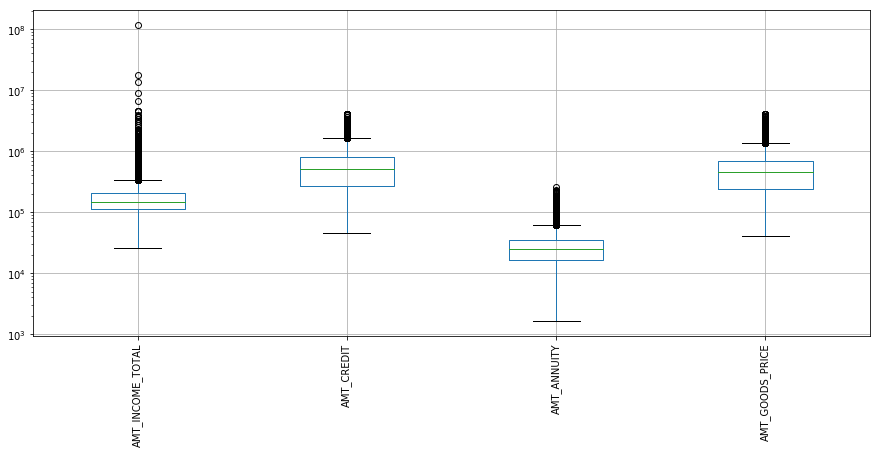

In [187]:
# Plotting box plot of 4 columns which have high number of outliers
fig,ax=plt.subplots(figsize=(15,6))
clean_data.boxplot(column=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'],ax=ax)
plt.xticks(rotation=90)
plt.yscale('log',basey=10)
plt.show()

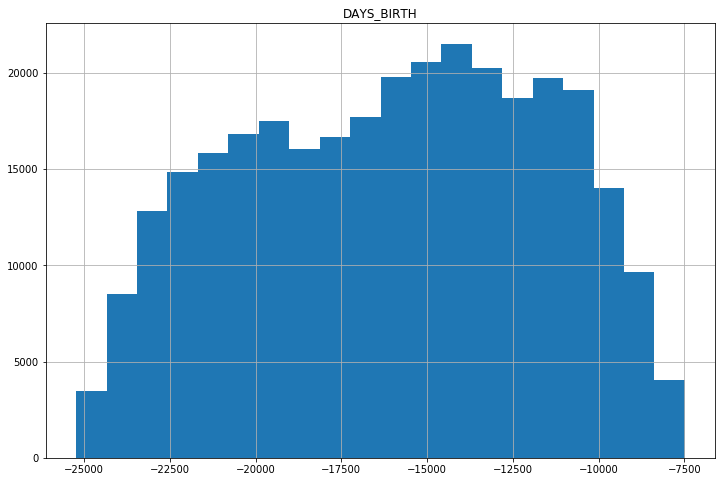

In [199]:
# Binning of continuous the data and plotting it on a historgram - 1
clean_data.hist('DAYS_BIRTH',bins=20,figsize=(12,8))
plt.show()

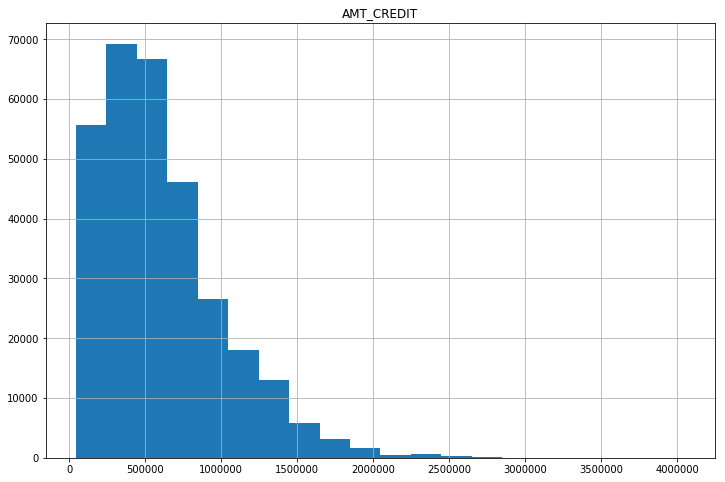

In [190]:
# Binning of continuous the data and plotting it on a historgram - 2
df.hist('AMT_CREDIT',bins=20,figsize=(12,8))
plt.show()

In [211]:
# IMbalance in Data
# Formula_for_Imbalance_percentage = (#Rows where target=1/Total Number of rows)*100
rows_target_1=clean_data.TARGET.loc[(clean_data.TARGET==1)].count()
total_rows=clean_data.shape[0]
imbalancepercentage_1= (rows_target_1/total_rows)*100
imbalancepercentage_1

8.072881945686495

In [212]:
rows_target_0=clean_data.TARGET.loc[(clean_data.TARGET==0)].count()
imbalancepercentage_0=(rows_target_0/total_rows)*100
imbalancepercentage_0

91.92711805431351

In [254]:
TARGET_0 = clean_data.loc[(clean_data.TARGET==0)]
TARGET_1 = clean_data.loc[(clean_data.TARGET==1)]

### UNIVARIATE ANALYSIS

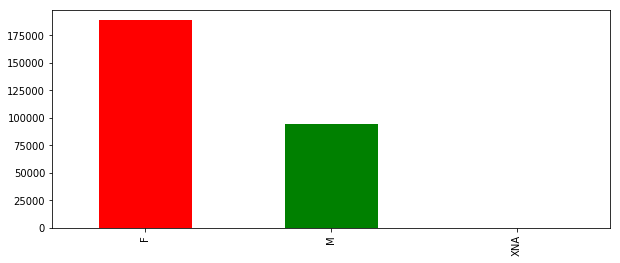

In [300]:
fig,ax = plt.subplots(figsize = (10,4))
TARGET_0.CODE_GENDER.value_counts().plot(kind = 'bar',color = ['red','green'])
plt.show()

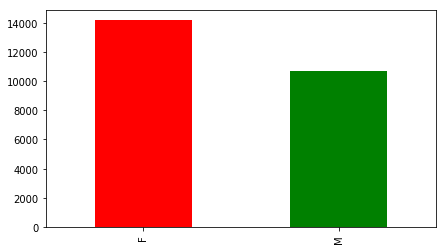

In [303]:
fig,ax = plt.subplots(figsize = (7,4))
TARGET_1.CODE_GENDER.value_counts().plot(kind = 'bar',color = ['red','green'],ax=ax)
plt.show()

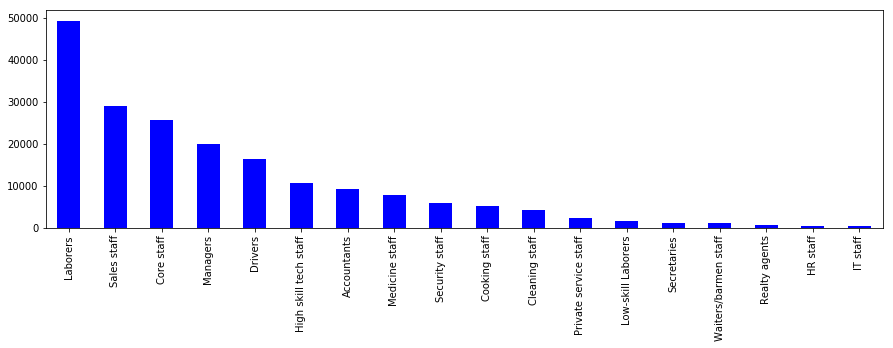

In [309]:
fig,ax = plt.subplots(figsize = (15,4))
TARGET_0.OCCUPATION_TYPE.value_counts().plot(kind = 'bar',color = ['blue'])
plt.show()

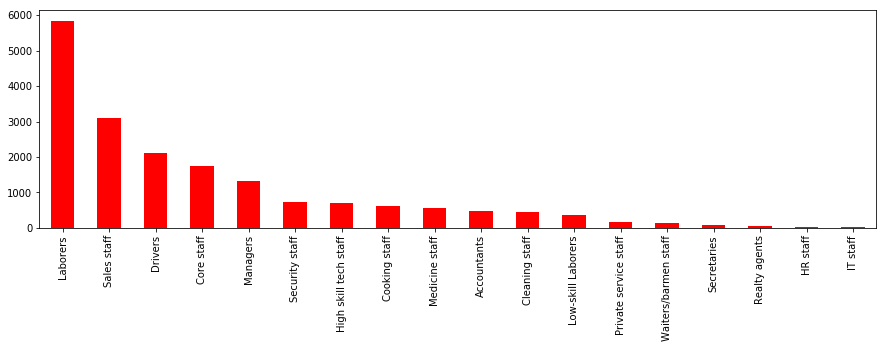

In [315]:
fig,ax = plt.subplots(figsize = (15,4))
TARGET_1.OCCUPATION_TYPE.value_counts().plot(kind = 'bar',color = ['red'])
plt.show()

### BIVARIATE ANALYSIS

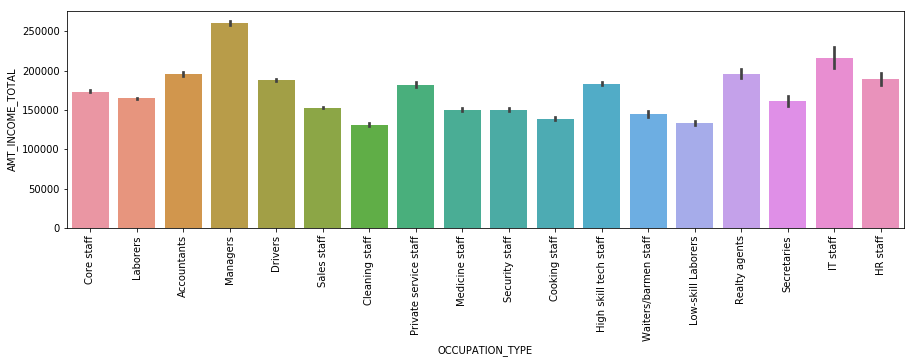

In [331]:
fig,ax=plt.subplots(1,1,figsize=(15,4))
sns.barplot(data=TARGET_0,x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',ax=ax)
plt.xticks(rotation='vertical')
plt.show()

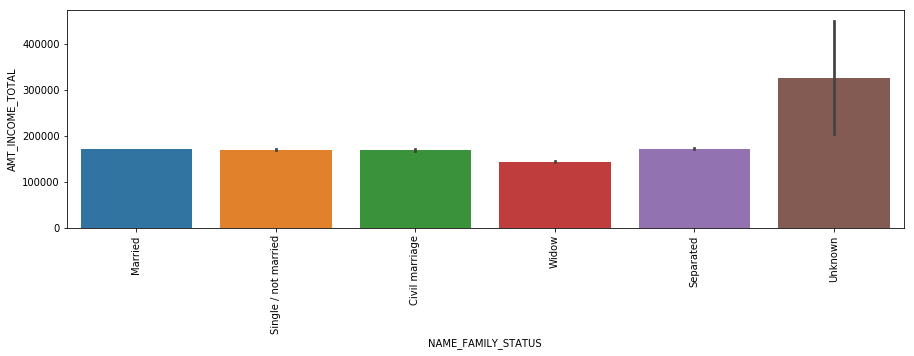

In [330]:
fig,ax=plt.subplots(1,1,figsize=(15,4))
sns.barplot(data=TARGET_0,x='NAME_FAMILY_STATUS',y='AMT_INCOME_TOTAL',ax=ax)
plt.xticks(rotation='vertical')
plt.show()

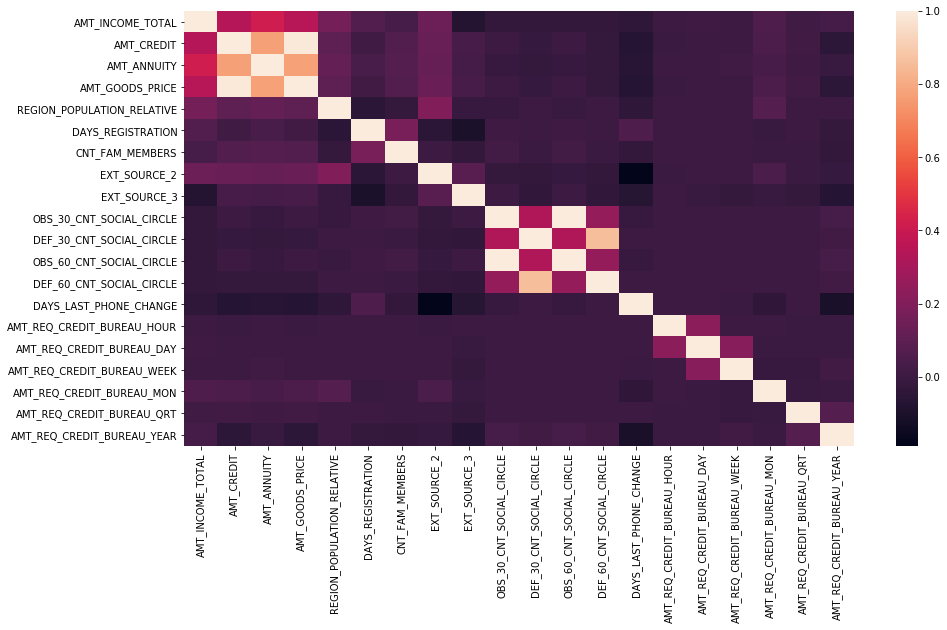

In [369]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
num_target_0=TARGET_0.select_dtypes(['float64'])
sns.heatmap(data=num_target_0.corr(),ax=ax)
plt.show()

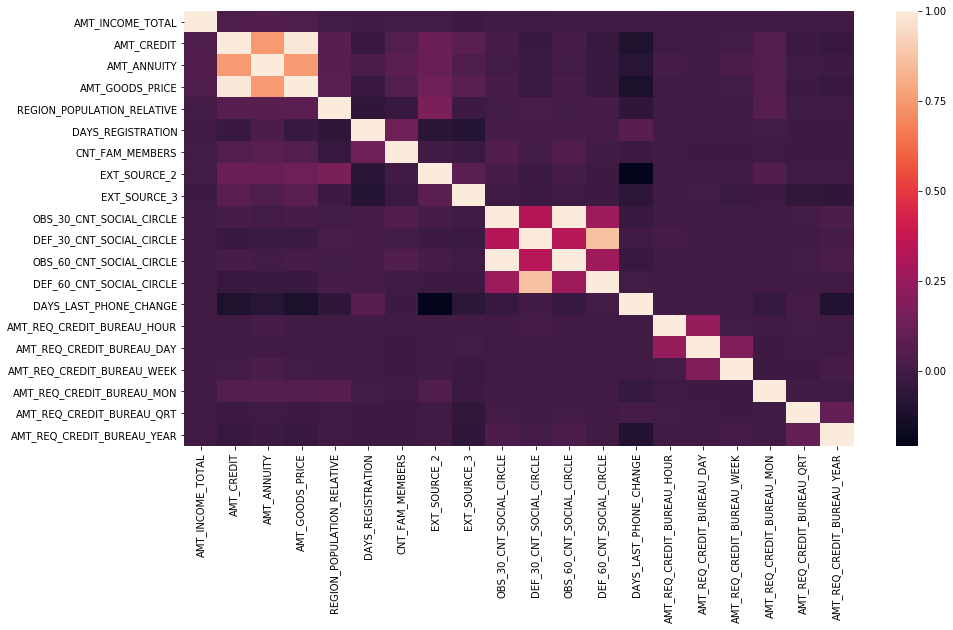

In [370]:
fig,ax=plt.subplots(1,1,figsize=(15,8))
num_target_1=TARGET_1.select_dtypes(['float64'])
sns.heatmap(data=num_target_1.corr(),ax=ax)
plt.show()

In [388]:
sns.barplot(data=clean_data,cols=['CODE_GENDER','OCCUPATION_TYPE'])

KeyboardInterrupt: 